2440050874 - Michael Julian

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [ ]:
def e_step(X, means, covariance, density):
  likelihood = np.zeros((10, 2))
  resp = np.zeros((10, 2))

  for i in range(2):
    likelihood[:, i] = multivariate_normal.pdf(X, means[i], covariance[i], allow_singular=True)
    resp[:, i] = density[i] * likelihood[:, i]
  
  log_likelihood = np.sum(np.log(np.sum(resp, axis=1)))
  resp = resp / resp.sum(axis=1, keepdims=1)

  return resp, log_likelihood


def m_step(X, means, covariance, resp):

  for i in range(2):
    weight = resp[:, [i]]
    total_weight = weight.sum()
    means[i] = (X * weight).sum(axis=0) / total_weight
    covariance[i] = np.cov(X.T, aweights=((weight/total_weight).flatten()), bias=True)
  density = resp.mean(axis=0)
  
  return means, covariance, density

In [ ]:
X = [[3, 8], [3, 6], [3, 4], [4, 7], [4, 5], [5, 5], [5, 1], [7, 4], [7, 3], [8, 5]]
X = np.array(X)

In [ ]:
means = np.array([[4, 6], [6.5, 3]])
covariance = np.array([[[0.675, 0.9], [0.9, 1.3]], [[0.675, 0.825], [0.825, 1.3]]])
density = np.array([5/10, 5/10])

In [ ]:
iters = 3
for i in range(iters):
  print(f'\n========================\nITERATION [{i+1}]\n========================')

  responsibility, log_likelihood = e_step(X, means, covariance, density)
  print(f"---------------------------\n> {i+1}.1. E-STEP...")
  print(f'\n>> Log Likelihood: {log_likelihood}')
  print('\n>> Responsibility:')
  print(responsibility)

  means, covariance, density = m_step(X, means, covariance, responsibility)
  print(f"---------------------------\n> {i+1}.2. M-STEP...")
  print('\n>> Updated Means:')
  print(means)
  print('\n>> Updated Covariances:')
  print(covariance)
  print('\n>> Updated Density:')
  print(density)
  print('========================\n')


ITERATION [1]
---------------------------
> 1.1. E-STEP...

>> Log Likelihood: -124.50464701054486

>> Responsibility:
[[1.00000000e+000 1.55255048e-044]
 [1.00000000e+000 3.76142085e-040]
 [1.00000000e+000 2.37355223e-024]
 [1.00000000e+000 7.35043033e-038]
 [1.00000000e+000 7.94098013e-020]
 [3.61098528e-001 6.38901472e-001]
 [3.58986004e-087 1.00000000e+000]
 [2.27593513e-081 1.00000000e+000]
 [1.96545938e-109 1.00000000e+000]
 [5.36516735e-092 1.00000000e+000]]
---------------------------
> 1.2. M-STEP...

>> Updated Means:
[[3.50776852 5.93264468]
 [6.50897794 3.49102206]]

>> Updated Covariances:
[[[ 0.3846503  -0.10050973]
  [-0.10050973  1.92810794]]

 [[ 1.38764629  0.98360477]
  [ 0.98360477  2.2499194 ]]]

>> Updated Density:
[0.53610985 0.46389015]


ITERATION [2]
---------------------------
> 2.1. E-STEP...

>> Log Likelihood: -35.37786637271427

>> Responsibility:
[[9.99999997e-01 3.18706700e-09]
 [9.99997303e-01 2.69664999e-06]
 [9.98580100e-01 1.41989962e-03]
 [9.99987

In [ ]:
print('New Values:\n============')
print(f'\nMeans: \n{means}')
print(f'\nCovariances: \n{covariance}')
print(f'\nDensity: {density}')

New Values:

Means: 
[[3.66204088 5.83349968]
 [6.74090715 3.26313427]]

Covariances: 
[[[ 0.55131489 -0.22280228]
  [-0.22280228  1.82493495]]

 [[ 1.19724484  1.53151114]
  [ 1.53151114  2.18982205]]]

Density: [0.59791722 0.40208278]


In [ ]:
labels = []

for i in range(len(responsibility)):
  if(responsibility[i][0] >= responsibility[i][1]):
    labels.append(0)
  else:
    labels.append(1)

labels

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1]

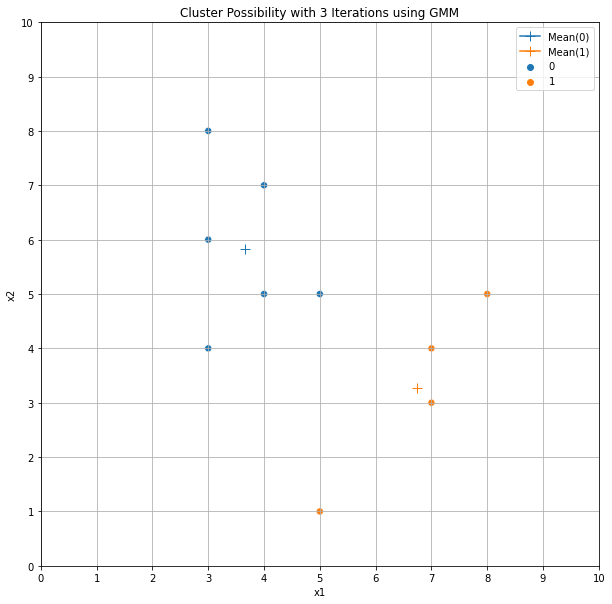

In [ ]:
df = pd.DataFrame({'x1':X[:, 0], 'x2':X[:, 1], 'Class (y)':labels})

plt.figure(figsize=(10, 10))
plt.grid()
sns.scatterplot(x='x1', y='x2', hue='Class (y)', data=df, s=50)

plt.plot(means[0][0], means[0][1], marker='+', markersize=10, label='Mean(0)')
plt.plot(means[1][0], means[1][1], marker='+', markersize=10, label='Mean(1)')

plt.xlim(0, 10)
plt.ylim(0, 10)
plt.legend()

plt.xticks(np.arange(0, 11))
plt.yticks(np.arange(0, 11))
plt.title("Cluster Possibility with 3 Iterations using GMM")
plt.show()